# Bootstrap

## 1. 

Generar 30 samples de una distribución Bernoulli de parámetro 𝑝 = 0.3.

In [32]:
import numpy as np
import matplotlib.pyplot as plt

p = 0.3

samples = np.random.choice([0, 1], size=30, p=[1-p, p])

### a) 
Encontrar el estimador plug-in del desvío estándar 𝜎 de la distribución.

In [33]:
# el plug-in estimator es simplemente suponer que la distribucion observada es la real

# entonces la varianza poblacional = varianza muestral

# varianza muestral de una bernoulli

sigma_plug_in = np.std(samples) #np.sqrt(p*(1-p))

In [34]:
sigma_plug_in

0.44221663871405326

### b) 
Estimar su error estándar usando bootstrap

Función que hice porque estaba al pedo:

In [35]:
def bootstrap(samples, N, funcion, histograma = False):
    """
    Realiza el método de bootstrap para estimar el estadístico deseado a partir de una muestra.
    Imprime el histograma si histograma == True.

    Parámetros:
    samples (numpy.ndarray): La muestra de la que se calculará el estadístico mediante bootstrap.
    N (int): El número de iteraciones de bootstrap a realizar.
    funcion (función de NumPy): La función que calcula el estadístico de interés.
    histrograma(bool): Booleano que decide si se imprime el histrograma de distribucion de los valores del estadistico

    Retorna:
    tuple: Un tuple conteniendo el valor estimado del estadístico y su error estándar.
    """
    import numpy as np
    import matplotlib.pyplot as plt
    bootstrap_dataset = np.zeros(N)
    for i in range(N):
        draws = np.random.choice(samples, size= len(samples), replace = True)
        bootstrap_dataset[i] = funcion(draws)
    if histograma:
        plt.hist(bootstrap_dataset)
    return np.mean(bootstrap_dataset), np.std(bootstrap_dataset)

(array([  3.,   0.,   4.,  19.,   0.,  47., 204., 167., 297., 259.]),
 array([0.17950549, 0.21155494, 0.24360439, 0.27565385, 0.3077033 ,
        0.33975275, 0.3718022 , 0.40385165, 0.4359011 , 0.46795055,
        0.5       ]),
 <BarContainer object of 10 artists>)

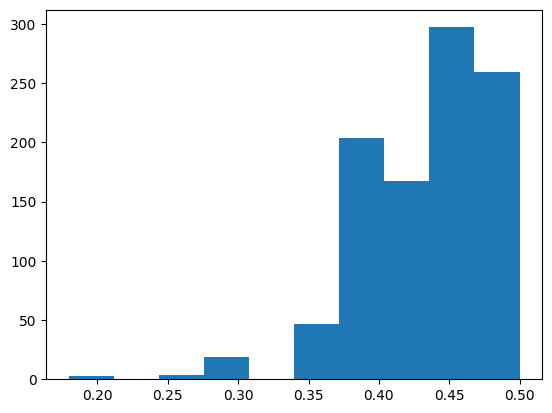

In [36]:
N = 1000
bootstrap_stds = np.zeros(N)
for i in range(N):
    draws = np.random.choice(samples, size= len(samples), replace=True)
    bootstrap_stds[i] = np.std(draws)
plt.hist(bootstrap_stds)

In [37]:
sigma_estimado = np.mean(bootstrap_stds)
se_sigma_estimado = np.std(bootstrap_stds)

print(f"sigma estimado usando bootstrap: {sigma_estimado}")
print(f"error estandar: {se_sigma_estimado}")

sigma estimado usando bootstrap: 0.4315097852486181
error estandar: 0.04714486788638562


### c) 
Encontrar un intervalo de confianza de nivel 0.95 usando los métodos normal, _percentile
bootstrap_, _basic bootstrap_ y _BCa_.

Creo que esto es _percentile bootstrap_

In [17]:
lower_bound = np.percentile(bootstrap_stds, 2.5)
upper_bound = np.percentile(bootstrap_stds, 97.5)
# 97.5 - 2.5 = 95
# el intervalo de confianza del 95% será aquel que cubra al 95% de los desvios estandar del histograma anterior

print(f"Intervalo de confianza del 95% para el desvío estándar estimado: {lower_bound, upper_bound}")


Intervalo de confianza del 95% para el desvío estándar estimado: (0.4229525846816506, 0.5)


## 2.
Considerar los datasets de los precios anuales de las acciones de The Coca-Cola Company y las búsquedas en Google de “my cat scratched me”

In [3]:
array_1 = np.array([8,7.91667,19.8333,18.5833,29.0833,30.3333,35.4167,43.6667,37.25,45.75,47.1667,48.5,67.3333,79.3333,74.6667,85.6667,])
array_2 = np.array([30.73,22.7,28.58,32.94,35.08,36.99,41.12,42.26,42.34,41.5,45.91,46.94,55.32,54.27,58.82,63.56,])
array_1_name = "Google searches for 'my cat scratched me'"
array_2_name = "The Coca-Cola Company's stock price (KO)"

### a)
Encontrar el estimador plug-in del coeficiente de correlación entre ambos conjuntos de datos

Uso el coeficiente de correlacion de Pearson

$r_{xy} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2} \sqrt{\sum_{i=1}^{n}(y_i - \bar{y})^2}}$

In [8]:
mean_array_1 = np.mean(array_1)
mean_array_2 = np.mean(array_2)
covariance = np.mean((array_1 - mean_array_1) * (array_2 - mean_array_2))
std_array_1 = np.std(array_1)
std_array_2 = np.std(array_2)
correlation_coef = covariance / (std_array_1 * std_array_2)

print(correlation_coef)

0.9739712296818737


Es lo mismo que hacer:

In [6]:
from scipy import stats

coeficiente_correlacion = stats.pearsonr(array_1, array_2)[0]

In [38]:
np.corrcoef(array_1, array_2)[1,0]

0.9739712296818734

### b) 
Estimar su error estándar usando bootstrap.

In [39]:
N = 1000
bootstrap_r = np.zeros(N)

for i in range(N):
    draws_1 = np.random.choice(array_1, size= len(array_1), replace=True)
    draws_2 = np.random.choice(array_2, size= len(array_2), replace=True)
    bootstrap_r[i] = stats.pearsonr(draws_1, draws_2)[0]

r_estimado = np.mean(bootstrap_r)
se_r_estimado = np.std(bootstrap_r)

print(f"error estandar: {se_r_estimado}")
print(r_estimado)

error estandar: 0.26047394324808376
0.0002763351496924482


??????????????????????

(array([ 17.,  54., 116., 188., 216., 180., 131.,  69.,  23.,   6.]),
 array([-0.6834949 , -0.53554795, -0.38760099, -0.23965403, -0.09170707,
         0.05623988,  0.20418684,  0.3521338 ,  0.50008076,  0.64802772,
         0.79597467]),
 <BarContainer object of 10 artists>)

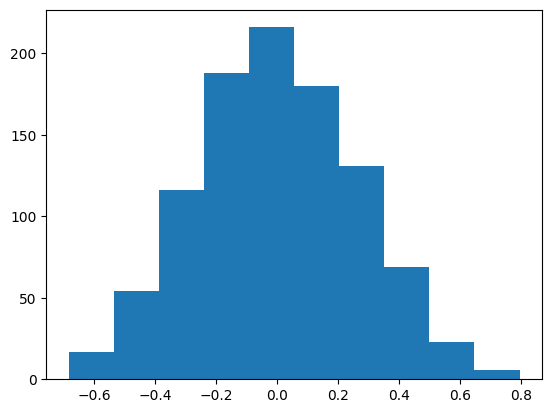

In [40]:
plt.hist(bootstrap_r)

# Test de Hipótesis

### 4.
 En 1000 tiradas de moneda aparecen 560 caras y 440 cecas. ¿Es razonable suponer que la moneda es justa, es decir que la probabilidad de cara y de ceca son iguales?

$X \sim Bin(1000, 0.5)$

$H_0 : p = 0.5$  
$H_1 : p \neq 0.5$

In [3]:
from scipy.stats import norm

n = 1000
p = 0.5  # moneda justa

p_obs = 560/n

Z = (p_obs - p) / (np.sqrt((p*(1-p))/n)) # estadistico Z ~ N(0,1) (aprox)

alpha = 0.05

Z_critico = norm.ppf(1 - alpha / 2) # dos colas, si  hubiera una cola sería alpha

print(f"Región de NO rechazo: {-Z_critico, Z_critico}")

print(f"Z_observado: {Z}")



Región de NO rechazo: (-1.959963984540054, 1.959963984540054)
Z_observado: 3.7947331922020586


$Z_{obs}$ está en la Región de rechazo, entonces la moneda no está equilibrada

### 5.
Se desea determinar si un dado de seis caras está cargado o no. Para ello se arroja el dado
1000 veces obteniéndose los siguientes resultados:
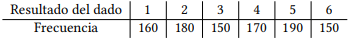  
Estamos interesados en testear las hipótesis $𝐻_0$: El dado es equilibrado vs. $H_1$: El dado está cargado.  
Para ello consideramos distintos tests:

#### a)
Sea 𝑋 = cantidad de veces que el resultado del dado es par. Plantear las hipótesis y determinar
la región de rechazo para un test de nivel aproximado 𝛼 = 0.05 basado en 𝑋. Para el conjunto
de datos obtenido, ¿cuál es el valor 𝑝 aproximado?, ¿cuál es la decisión?


$X \sim Bin(1000, 0.5)$


$H_0 : p = 0.5$  
$H_1 : p \neq 0.5$

In [10]:
x = 180 + 170 + 150 #cantidad de vaces que salio par
n = 1000
alpha = 0.05
p = 0.5 # dado justo

p_obs = x/n

print(f"valor p aproximado: {p_obs}")

Z = (p_obs - p) / np.sqrt(p*(1-p)/n)

print(f"valor del estadistico de prueba para un test de proporción: {Z}")

Z_critico = norm.ppf(1 - alpha / 2)

print(f"Región de NO rechazo: {-Z_critico, Z_critico}")

valor p aproximado: 0.5
valor del estadistico de prueba para un test de proporción: 0.0
Región de NO rechazo: (-1.959963984540054, 1.959963984540054)


$Z_{obs}$ no está en la Región de Rechazo, por lo tanto no rechazo la hipotesis inicial.  
No hacía falta hacer tanto, simplemente con ver que $p_{obs} = p$ alcanzaba para suponerlo

### b) 
Sea 𝑌 = cantidad de veces que el resultado del dado es menor o igual que 3. Plantear claramente las hipótesis y determinar la región de rechazo para un test de nivel aproximado
𝛼 = 0.05 basado en 𝑌.  
Para el conjunto de datos obtenido, ¿cuál es el valor 𝑝 aproximado?,
¿cuál es la decisión?


$Y \sim Bin(1000, 0.5)$


$H_0 : p = 0.5$  
$H_1 : p \neq 0.5$

In [11]:
y = 160 + 180 + 150

p_obs = y/n

print(f"valor p aproximado: {p_obs}")

Z = (p_obs - p) / np.sqrt(p*(1-p)/n)

print(f"valor del estadistico de prueba para un test de proporción: {Z}")

Z_critico = norm.ppf(1 - alpha / 2)

print(f"Región de NO rechazo: {-Z_critico, Z_critico}")

valor p aproximado: 0.49
valor del estadistico de prueba para un test de proporción: -0.6324555320336764
Región de NO rechazo: (-1.959963984540054, 1.959963984540054)


$Z_{obs}$ no está en la Región de Rechazo, por lo tanto no rechazo la hipotesis inicial.